In [31]:
%matplotlib inline
import moviepy.video.io.VideoFileClip as mpy
import moviepy.editor as mpyeditor
import cv2
import matplotlib.pyplot as plt
import numpy as np

# PART I

In [2]:
vid = mpy.VideoFileClip('shapes_video.mp4')

frame_count = vid.reader.nframes # 92 frames
video_fps = vid.fps

print('frame_count: ', frame_count)
print('video_fps: ', video_fps)

frame_count:  92
video_fps:  25.0


In [50]:
# height width channels = image.shape
def median_filter(image_rgb):
    '''
        This median filter processes RGB channels
        using zero padding with appropriate filter mask size,
        after noise removal it removes zero paddings.
    '''
    fw, fh = 3, 3
    window_size = fw * fh
    mid_index = (window_size) // 2

    resulting_image = image_rgb.copy()
    zero_padded_image = np.zeros(shape=(frame.shape[0] + (2 * (fh//2)), frame.shape[1] + (2 * (fw//2)), frame.shape[2]))
    zero_padded_image[fh//2:zero_padded_image.shape[0] - 2 * (fh//2) + 1,
                      fw//2:zero_padded_image.shape[1] - 2 * (fw//2) + 1, :] = image_rgb
    for channel, image in enumerate(cv2.split(zero_padded_image)):
        h, w = image.shape[:2]
        image_one_channel = np.zeros_like(image)
        image_window = np.zeros(shape=(window_size))
        half_fw = fw // 2
        half_fh = fh // 2
        for x in range(half_fw, w - half_fw):
            for y in range(half_fh, h - half_fh):
                window_index = 0
                for fx in range(0, fw):
                    for fy in range(0, fh):
                        y_index = y + fy - half_fh
                        x_index = x + fx - half_fw
                        image_window[window_index] = image[y_index][x_index]
                        window_index += 1
                image_window.sort()
                pixel_value = image_window[mid_index]
                if pixel_value > 255:
                    image_one_channel[y][x] = 255
                elif pixel_value < 0:
                    image_one_channel[y][x] = 0
                else:
                    image_one_channel[y][x] = pixel_value
                
        resulting_image[:, :, channel] = image_one_channel[fh//2:zero_padded_image.shape[0] - 2 * (fh//2) + 1,fw//2:zero_padded_image.shape[1] - 2 * (fw//2) + 1]
    
    return resulting_image
    

In [51]:
images_list = []
for i in range(frame_count):
    # type(frame): <class 'numpy.ndarray'>
    frame = vid.get_frame(i * 1.0 / video_fps)
    median_applied_frame = median_filter(frame)
    images_list.append(median_applied_frame)

clip = mpyeditor.ImageSequenceClip(images_list , fps = 25)
clip.write_videofile('part1_video.mp4' , codec='libx264')


KeyboardInterrupt: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(576, 720, 3)
(578, 722, 3)
(576, 720, 3)


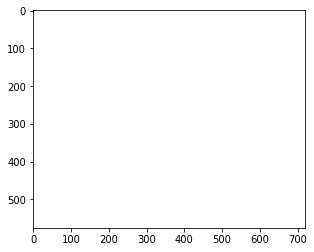

In [44]:
frame = 0
for i in range(frame_count):
    # type(frame): <class 'numpy.ndarray'>
    frame = vid.get_frame(i * 1.0 / video_fps)
    break
fw, fh = 3, 3
zero_padded_image = np.ones(shape=(frame.shape[0] + (2 * (fh//2)), frame.shape[1] + (2 * (fw//2)), frame.shape[2])) * 255
# plt.imshow(zero_padded_image)
print(frame.shape)
print(zero_padded_image.shape)
frame = zero_padded_image[fh//2:zero_padded_image.shape[0] - 2 * (fh//2) + 1,
                          fw//2:zero_padded_image.shape[1] - 2 * (fw//2) + 1, :]
plt.imshow(frame)
print(frame.shape)

In [ ]:
# height width channels = image.shape
def median_filter(image_rgb):
    '''
        not processing boundaries approach
    '''
    resulting_image = image_rgb.copy()
    for channel, image in enumerate(cv2.split(image_rgb)):
        h, w = image.shape[:2]
        output_pixel_value = np.zeros_like(image)
        window_width, window_height = 3, 3
        window = np.zeros(shape=(window_width * window_height))
        edgex = window_width // 2
        edgey = window_height // 2
        for x in range(edgex, w - edgex):
            for y in range(edgey, h - edgey):
                i = 0
                for fx in range(0, window_width):
                    for fy in range(0, window_height):
                        window[i] = image[y + fy - edgey][x + fx - edgex]
                        i += 1
                window.sort()
                pixel_value = window[window_width * window_height // 2]
                if pixel_value > 255:
                    output_pixel_value[y][x] = 255
                elif pixel_value < 0:
                    output_pixel_value[y][x] = 0
                else:
                    output_pixel_value[y][x] = pixel_value
                
        resulting_image[:, :, channel] = output_pixel_value
    
    return resulting_image

# image = cv2.imread('noisy_image.png')
# plt.imshow(image)
# print(frame.shape)
# plt.imshow(frame)
# median_applied_frame = median_filter(frame)
# median_applied_image = median_filter(image)
# plt.imshow(median_applied_image)
# plt.imshow(median_applied_frame)



In [ ]:
# height width channels = image.shape
def median_filter(image):
    '''
        not processing boundaries approach
    '''
    h, w = image.shape[:2]
    output_pixel_value = np.zeros_like(image)
    window_width, window_height = 3, 3
    window = np.zeros_like((window_width * window_height))
    edgex = window_width // 2
    edgey = window_height // 2
    for x in range(edgex, w - edgex):
        for y in range(edgey, h - edgey):
            i = 0
            for fx in range(0, window_width):
                for fy in range(0, window_height):
                    window[i] = image[x + fx - edgex][y + fy - edgey]
                    i += 1
            window.sort()
            pixel_value = window[window_width * window_height // 2]
            if pixel_value > 255:
                output_pixel_value[x][y] = 255
            elif pixel_value < 0:
                output_pixel_value[x][y] = 0
            else:
                output_pixel_value[x][y] = pixel_value
                
    return output_pixel_value

median_applied_frame = median_filter(frame)
plt.imshow(median_applied_frame)

# height width channels = image.shape
def median_filter(image):
    '''
        not processing boundaries approach
    '''
    h, w = image.shape[:2]
    output_pixel_value = np.zeros_like(image)
    window = np.zeros_like((w * h))
    edgey = int(h / 2)
    edgex = int(w / 2)
    for x in range(edgex, w - edgex):
        for y in range(edgey, h - edgey):
            i = 0
            for fx in range(0, w):
                for fy in range(0,h):
                    window[i] = image[x + fx - edgex][y + fy - edgey]
                    i += 1
            window.sort()
            output_pixel_value[x][y] = window[w * h / 2]
    return output_pixel_value

median_applied_frame = median_filter(frame)
plt.imshow(median_applied_frame)


# height width channels = image.shape
def median_filter(image_rgb):
    '''
        not processing boundaries approach
    '''
    fw, fh = 3, 3
    zero_padded_image = np.ones(shape=(frame.shape[0] + (2 * (fh//2)), frame.shape[1] + (2 * (fw//2)), frame.shape[2])) * 255
    # plt.imshow(zero_padded_image)
    print(frame.shape)
    print(zero_padded_image.shape)
    frame = zero_padded_image[fh//2:zero_padded_image.shape[0] - 2 * (fh//2) + 1,
                            fw//2:zero_padded_image.shape[1] - 2 * (fw//2) + 1, :]
    plt.imshow(frame)
    print(frame.shape)


    resulting_image = image_rgb.copy()
    for channel, image in enumerate(cv2.split(image_rgb)):
        h, w = image.shape[:2]
        output_pixel_value = np.zeros_like(image)
        window_width, window_height = 3, 3
        window = np.zeros(shape=(window_width * window_height))
        edgex = window_width // 2
        edgey = window_height // 2
        for x in range(edgex, w - edgex):
            for y in range(edgey, h - edgey):
                i = 0
                for fx in range(0, window_width):
                    for fy in range(0, window_height):
                        window[i] = image[y + fy - edgey][x + fx - edgex]
                        i += 1
                window.sort()
                pixel_value = window[window_width * window_height // 2]
                if pixel_value > 255:
                    output_pixel_value[y][x] = 255
                elif pixel_value < 0:
                    output_pixel_value[y][x] = 0
                else:
                    output_pixel_value[y][x] = pixel_value
                
        resulting_image[:, :, channel] = output_pixel_value
    
    return resulting_image

images_list = []
for i in range(frame_count):
    # type(frame): <class 'numpy.ndarray'>
    frame = vid.get_frame(i * 1.0 / video_fps)
    median_applied_frame = median_filter(frame)
    images_list.append(median_applied_frame)
    if i != 0 and i % 10 == 0:
        break
clip = mpyeditor.ImageSequenceClip(images_list , fps = 25)
clip.write_videofile('part1_video.mp4' , codec='libx264')

plt.imshow(frame)
print(frame.shape)